In [1]:
### uncomment to display figures
# %matplotlib inline

# Demonstrates benchmarking functionality - CMRS ET

In [2]:
from awrams.benchmarking.benchmark import Benchmark
from awrams.benchmarking.utils import read_id_csv
from awrams.utils import datetools as dt

## Set up comparison
comparing CMRS ET over chosen catchments

In [3]:
data_path = '../../test_data/benchmarking/'
obs_csv = data_path+'/cmrset/cmrset.csv'

catchment_csv = data_path+'/catchment_ids.csv'
id_list=read_id_csv(catchment_csv)

et = Benchmark("CMRS_ET", "evapotranspiration")
et.load(obs_csv, id_list=id_list)

In [4]:
et.sites

['113004',
 '4508',
 '107002',
 '108003',
 '111101',
 '112102',
 '105001',
 '116008',
 '5115',
 '109001']

## Add models to the comparison
read data from pre-processed csv

In [5]:
csv_data = data_path+'/cmrset/awral_etot_avg.csv'
et.add_model("AWRAMSI_v4_0_AWRAL", data_csv=csv_data)

### Show list of loaded or selected models
list of loaded models is available with <tab> activated dropdown by typing "et.models."<br>
can "select" or "unselect" models for displaying

In [6]:
et.benchmark.selection

['AWRAMSI_v4_0_AWRAL']

In [7]:
et.benchmark.selection.AWRAMSI_v4_0_AWRAL.unselect()
et.benchmark.selection.AWRAMSI_v4_0_AWRAL.select()

## Regression plotting
specify frequency by "freq=d" for daily, "freq=m" for monthly, "freq=y" for yearly<br>
can customise titles, labels, scaling etc using standard matplotlib keyword arguments


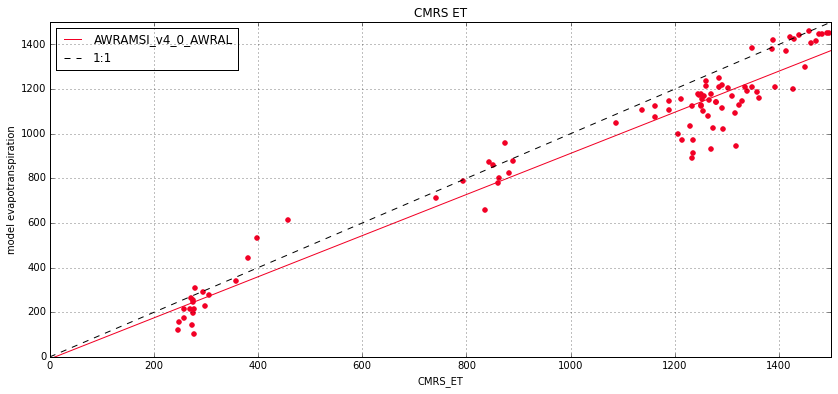

In [8]:
p = et.benchmark.plot_regression(title="CMRS ET", freq='y', xlim=[0,1500], ylim=[0,1500])

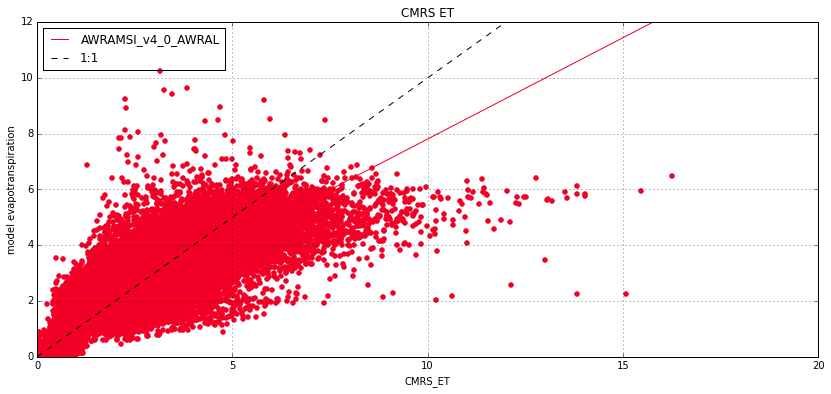

In [9]:
p = et.benchmark.plot_regression(title="CMRS ET", freq='d', xlim=[0,None], ylim=[0,None])

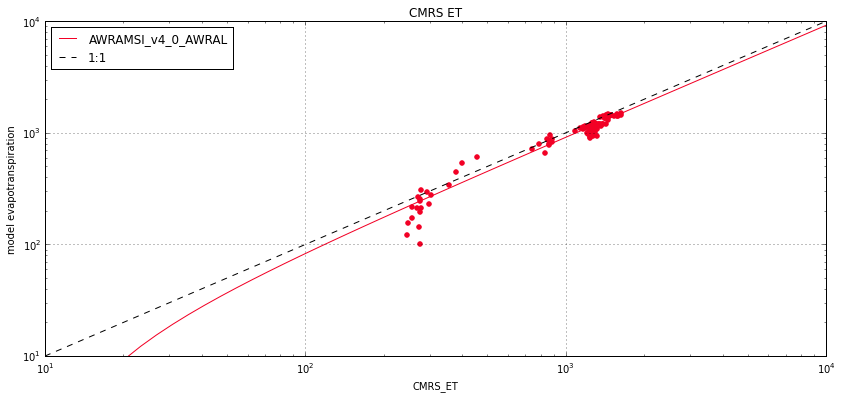

In [10]:
p = et.benchmark.plot_regression(title="CMRS ET", freq='y', yscale='log', xscale='log', ylim=[10,10000], xlim=[10,10000])

## Statistics plotting
specify statistic type and frequency

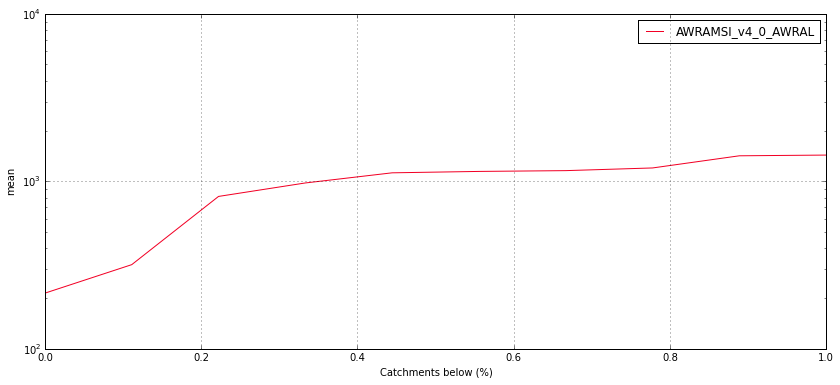

In [11]:
p = et.benchmark.plot_cdf('mean', freq='y', yscale='log')

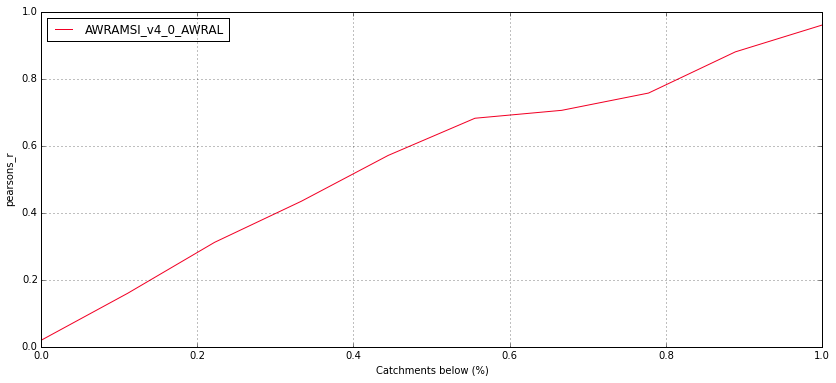

In [12]:
p = et.benchmark.plot_cdf('pearsons_r', freq='y', ylim=[0,1])

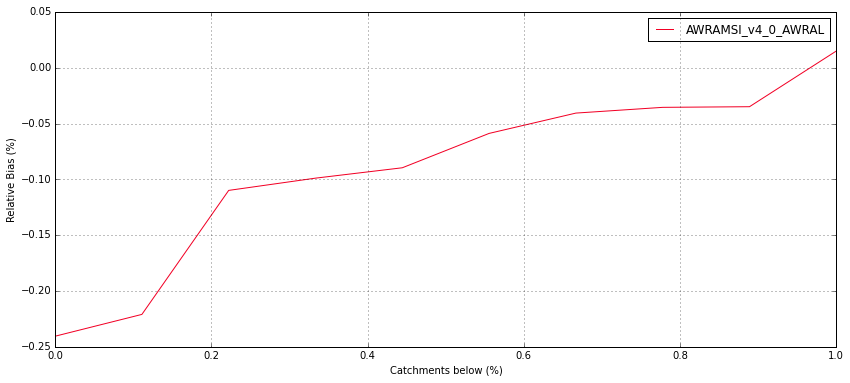

In [13]:
p = et.benchmark.plot_cdf('bias_relative',freq='y', ylabel='Relative Bias (%)')

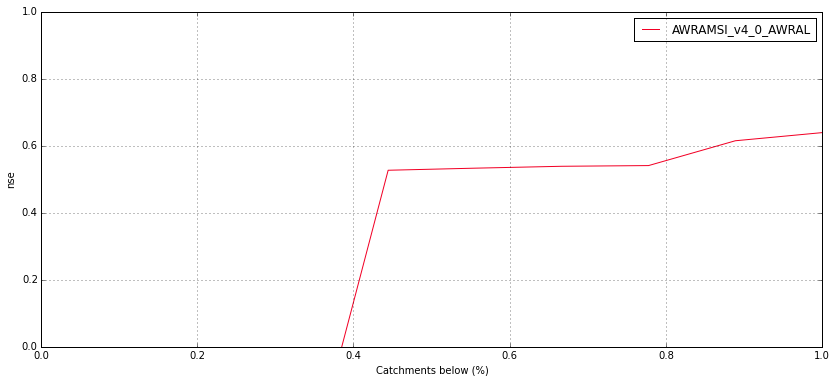

In [14]:
p = et.benchmark.plot_cdf('nse',freq='m', ylim=[0,1])

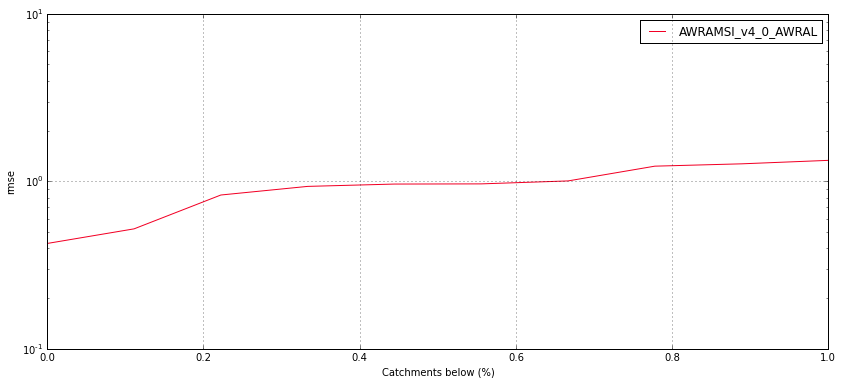

In [15]:
p = et.benchmark.plot_cdf('rmse',freq='d', yscale='log')

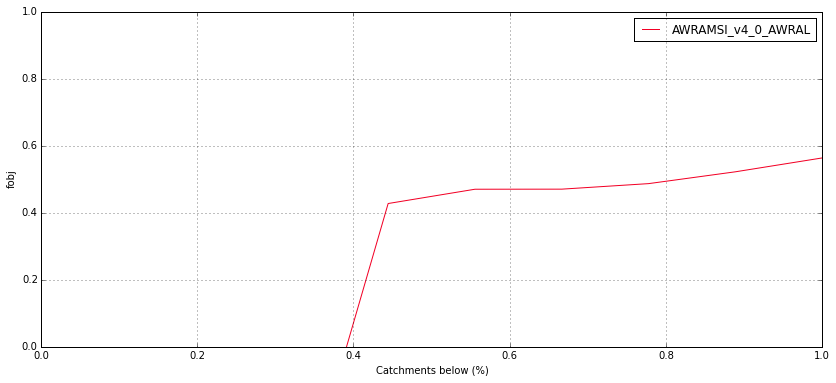

In [16]:
p = et.benchmark.plot_cdf('fobj',freq='d', ylim=[0,1])

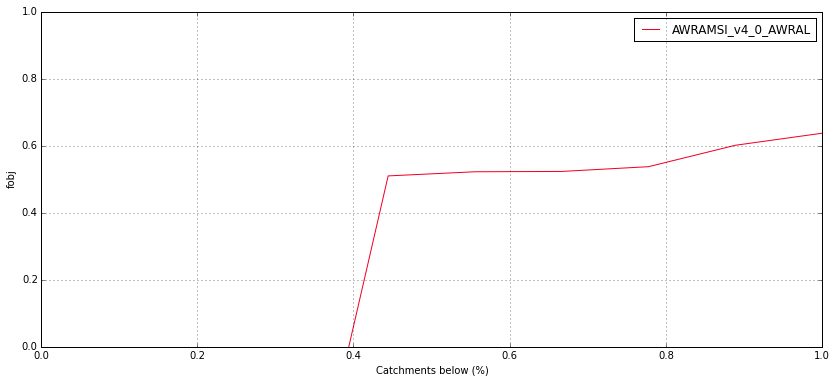

In [17]:
p = et.benchmark.plot_cdf('fobj',freq='m', ylim=[0,1])

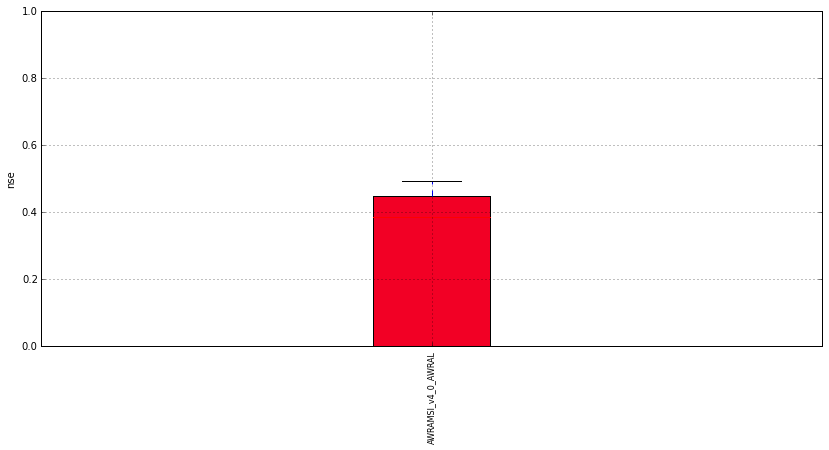

In [18]:
p = et.benchmark.plot_box('nse', freq='d', ylim=[0,1])

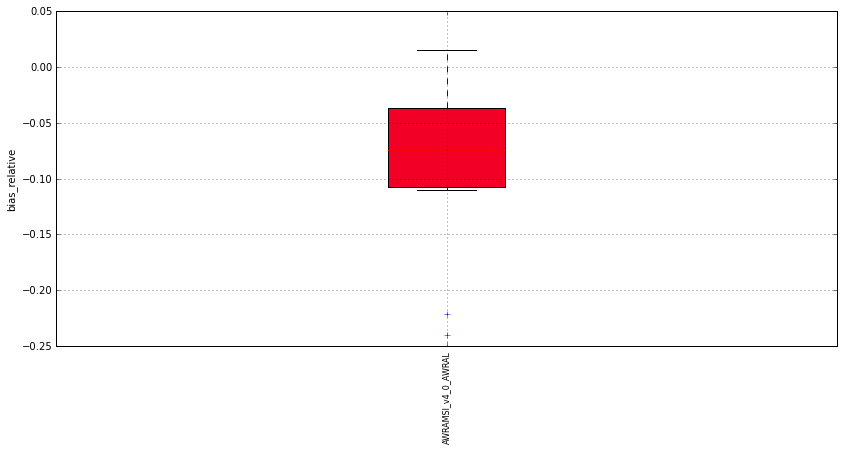

In [19]:
p = et.benchmark.plot_box('bias_relative', freq='m')

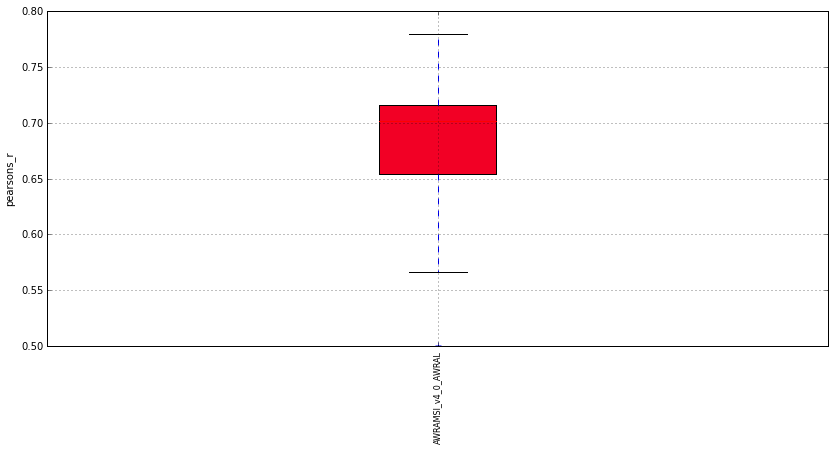

In [20]:
p = et.benchmark.plot_box('pearsons_r', freq='d')

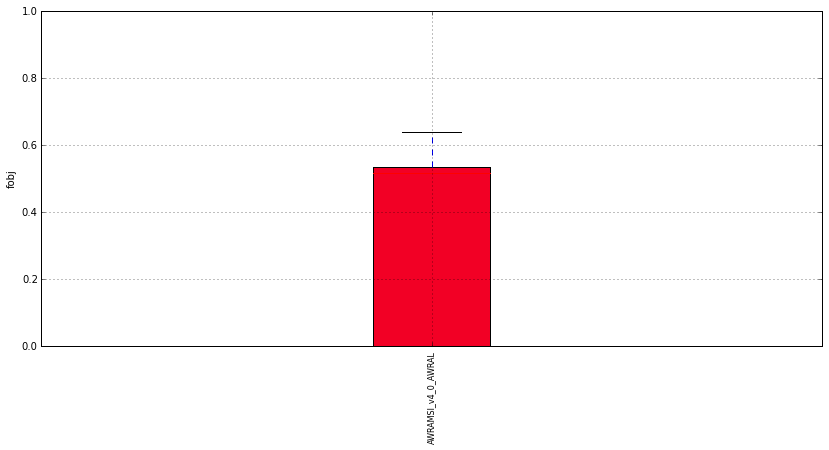

In [21]:
p = et.benchmark.plot_box('fobj', freq='m', ylim=[0,1])

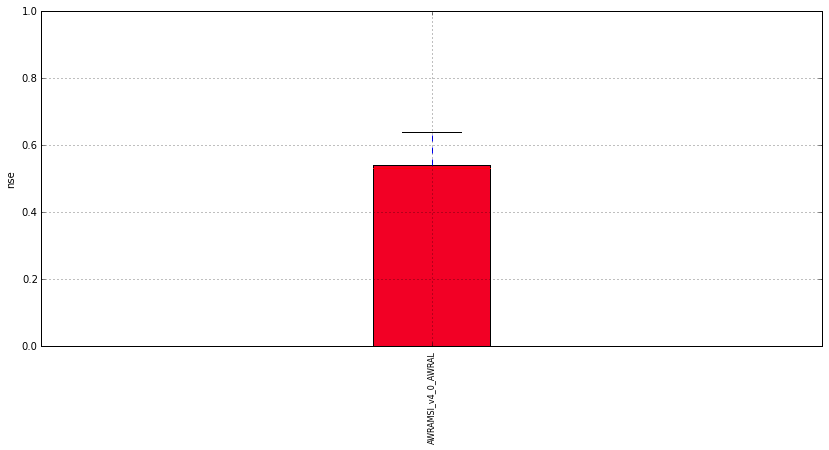

In [22]:
p = et.benchmark.plot_box('nse', freq='m', ylim=[0,1])

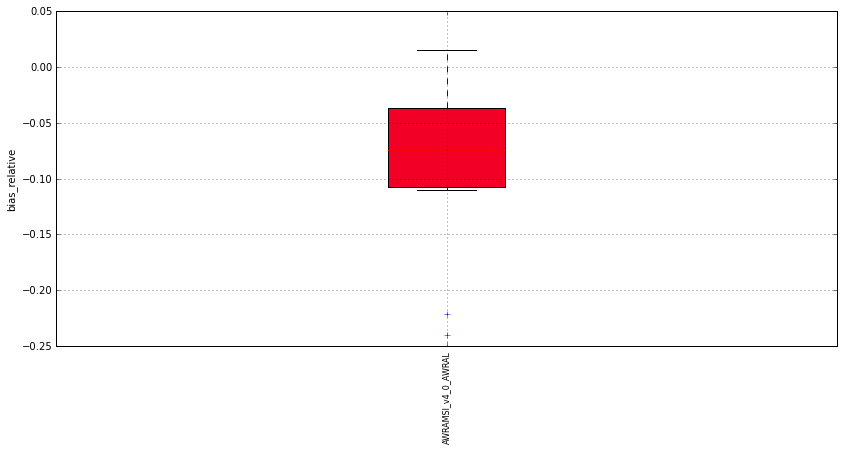

In [23]:
p = et.benchmark.plot_box('bias_relative', freq='m')

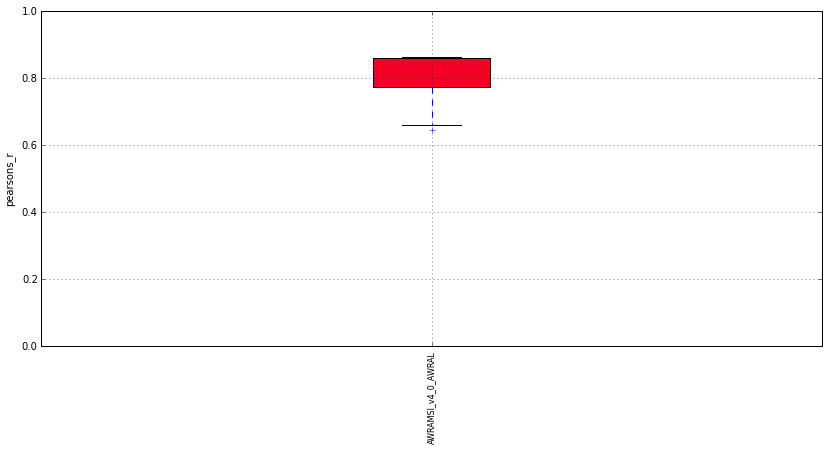

In [24]:
p = et.benchmark.plot_box('pearsons_r', freq='m', ylim=[0,1])

## View some statistics
Summary percentiles can be printed out by specifying a statistic to the 'stat_percentiles' function<br>
The timeframe defaults to monthly, but can be specified

In [25]:
et.benchmark.stat_percentiles('grand_f')

,grand_f
AWRAMSI_v4_0_AWRAL,-0.037849


In [26]:
et.benchmark.stat_percentiles('nse')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v4_0_AWRAL,-4.459714,-3.517515,-1.800555,0.530427,0.540763,0.628785,0.639714


In [27]:
et.benchmark.stat_percentiles('bias_relative')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v4_0_AWRAL,-0.240516,-0.231721,-0.107109,-0.074186,-0.036723,-0.007421,0.015031


In [28]:
et.benchmark.stat_percentiles('pearsons_r')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v4_0_AWRAL,0.644339,0.650918,0.774192,0.840725,0.860419,0.863277,0.863822
